In [1]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

# Secret Share Generation

In order to the secret shares we need to specify the number of shares we want to generate, the number of shares needed to reconstruct the secret and the secret itself. The secret can be any data, $D$, that can be converted to a number. In this example we will let the number `123` be our secret. We will generate `5` shares ($n = 5$), `3` of which are needed to reconstruct the secret ($k = 3$).

## Generate Polynomial

> **INFO**: A $k-1$ degree polynomial is necessary when $k$ is the number of shares needed to reconstruct the secret.

Because we are using 3 shares the following polynomial is used to generate the secret shares:

$$
f(x) = a_0 + a_1x^1 + a_2x^2
$$

As per the construction in the paper we let $a_0 = D$ and $a_1, a_2$ be random numbers. The following code generates the polynomial coefficients. In this example 3 and 19 are the random numbers.

$$
f(x) = D + 3x^1 + 19x^2 = 123 + 3x^1 + 19x^2
$$

## Generate Secret Shares from Polynomial 

> **INFO**: For n shares we evaluate the polynomial at $x = 1, 2, 3, \dots, n$.

We generate the secret shares by evaluating the polynomial at $x = 1, 2, 3, 4, 5$. The following table shows the secret shares.

$$ f(1) = 145 $$
$$ f(2) = 205 $$
$$ f(3) = 303 $$
$$ f(4) = 439 $$
$$ f(5) = 613 $$

In [2]:
secret = 123 # secret to be shared
n = 5 # number of shares
k = 3 # number of shares needed to reconstruct the secret


def gen_shares(n, k, secret):
    """
    Generate n shares of the secret, where k shares are needed to reconstruct the secret.
    """
    assert n >= k, "n must be greater than or equal to k"
    assert k > 1, "k must be an integer greater than 1"
    assert secret >= 0, "secret must be an integer greater than or equal to 0"

    # Generate a random polynomial
    MAX_INT = 2**10
    poly = np.random.randint(MAX_INT, size=k)
    
    # Set the constant term as the secret
    poly[-1] = secret

    # Evaluate the polynomial at n points
    x = np.arange(1, n+1)
    y = np.polyval(poly, x)
    return (x, y)

print("The secrets generated are different to the example as the random polynomial is different")
secret_shares_x, secret_shares_y = gen_shares(n, k, secret)
print(secret_shares_y)

The secrets generated are different to the example as the random polynomial is different
[ 1458  4203  8358 13923 20898]


# Secret Share Reconstruction


To reconstruct the secret we need to use at least $k$ shares. In this example we will use 3 shares to reconstruct the secret. Reconstructing the secret is done by evaluating the [Lagrange polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial) at $x = 0$ ([see my implementation of Lagrange interpolation here](https://github.com/Blake-Haydon/Polynomial-Interpolation)).

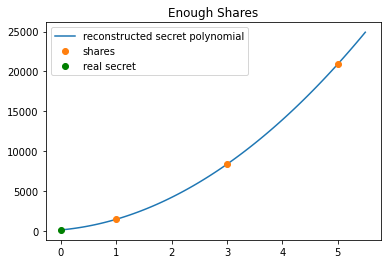

The reconstructed secret is 123.0


In [3]:
# The shares are chosen randomly, highlighting how any 3 of the 5 shares can be used to reconstruct the secret
share_0_x = secret_shares_x[0]
share_0_y = secret_shares_y[0]
share_1_x = secret_shares_x[4]
share_1_y = secret_shares_y[4]
share_2_x = secret_shares_x[2]
share_2_y = secret_shares_y[2]

# Use the 3 shares to reconstruct the secret
poly = lagrange([share_0_x, share_1_x, share_2_x], [share_0_y, share_1_y, share_2_y])

plt.plot(np.linspace(0, 5.5, 100), poly(np.linspace(0, 5.5, 100)), label='reconstructed secret polynomial')
plt.plot([share_0_x, share_1_x, share_2_x], [share_0_y, share_1_y, share_2_y], 'o', label='shares')
plt.plot(0, poly(0), 'go', label='real secret')
plt.legend()
plt.title("Enough Shares")
plt.show()

print("The reconstructed secret is", poly(0))

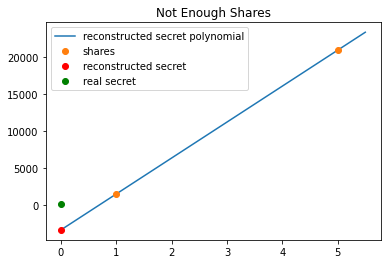

The incorrectly reconstructed secret is -3402.0


In [4]:
# What happens if there are enough shares to reconstruct the secret?
# This time we will use 2 shares to reconstruct the secret
bad_poly = lagrange([share_0_x, share_1_x], [share_0_y, share_1_y])

plt.plot(np.linspace(0, 5.5, 100), bad_poly(np.linspace(0, 5.5, 100)), label='reconstructed secret polynomial')
plt.plot([share_0_x, share_1_x], [share_0_y, share_1_y], 'o', label='shares')
plt.plot(0, bad_poly(0), 'ro', label='reconstructed secret')
plt.plot(0, poly(0), 'go', label='real secret')
plt.legend()
plt.title("Not Enough Shares")
plt.show()

print("The incorrectly reconstructed secret is", bad_poly(0))